# Understand the Data

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("C:\\Users\\Rudra\\Downloads\\Diwali Sales Data.csv", encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [48]:
df.shape

(11251, 15)

In [49]:
df.size

168765

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [51]:
df.sample(7)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
7311,1002213,Jas,P00367142,M,26-35,31,0,Maharashtra,Western,Healthcare,Clothing & Apparel,4,6993.0,NaN,NaN
2979,1000722,Karen,P00178242,F,26-35,29,0,Kerala,Southern,Retail,Tupperware,3,12327.0,NaN,NaN
748,1003790,Lela,P00085242,M,26-35,32,0,Uttarakhand,Central,Hospitality,Food,1,19282.0,NaN,NaN
7316,1000673,Odegard,P00210042,F,26-35,26,0,Uttar Pradesh,Central,Chemical,Clothing & Apparel,3,6991.0,NaN,NaN
3804,1004652,Astrea,P00295842,M,26-35,27,1,Delhi,Central,Aviation,Food,1,11390.0,NaN,NaN
4268,1002909,Debra,P00093342,F,26-35,32,0,Haryana,Northern,Aviation,Electronics & Gadgets,3,9942.0,NaN,NaN
8842,1001281,Gjertsen,P00046442,F,26-35,29,1,Maharashtra,Western,Banking,Clothing & Apparel,4,5249.0,NaN,NaN


# Data Cleaning and Memory Optimization

In [52]:
df.drop(columns=['Status','unnamed1'], inplace =True)

In [53]:
dtype_mapping = {
    'User_ID': 'Int8',
    'Marital_Status': 'Int8',
    'Orders': 'Int16',
    'Amount': 'float16',
    'Zone': 'category',
    'Occupation': 'category',
    'Gender': 'str'
}

df = df.astype(dtype_mapping, errors='ignore')


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   User_ID           11251 non-null  int64   
 1   Cust_name         11251 non-null  object  
 2   Product_ID        11251 non-null  object  
 3   Gender            11251 non-null  object  
 4   Age Group         11251 non-null  object  
 5   Age               11251 non-null  int64   
 6   Marital_Status    11251 non-null  Int8    
 7   State             11251 non-null  object  
 8   Zone              11251 non-null  category
 9   Occupation        11251 non-null  category
 10  Product_Category  11251 non-null  object  
 11  Orders            11251 non-null  Int16   
 12  Amount            11239 non-null  float16 
dtypes: Int16(1), Int8(1), category(2), float16(1), int64(2), object(6)
memory usage: 803.1+ KB


In [55]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [56]:
df['Amount'] = df['Amount'].fillna(0)

df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [57]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,11251.0,NaN,NaN,NaN,1003004.488134,1716.125402,1000001.0,1001492.0,1003065.0,1004430.0,1006040.0
Cust_name,11251,1250,Vishakha,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_ID,11251,2351,P00265242,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11251,2,F,7842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age Group,11251,7,26-35,4543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,11251.0,NaN,NaN,NaN,35.421207,12.754122,12.0,27.0,33.0,43.0,92.0
Marital_Status,11251.0,<NA>,<NA>,<NA>,0.420318,0.493632,0.0,0.0,0.0,1.0,1.0
State,11251,16,Uttar Pradesh,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zone,11251,5,Central,4296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,11251,15,IT Sector,1588,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

## Age

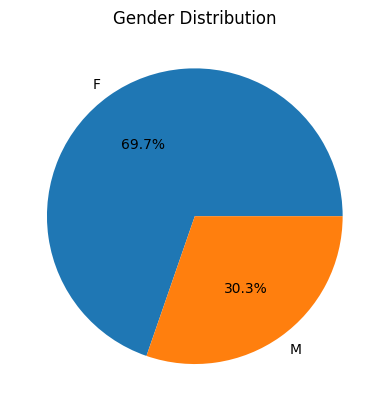

In [58]:
gender_counts = df['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

Female are our major contributor `(~70%)`

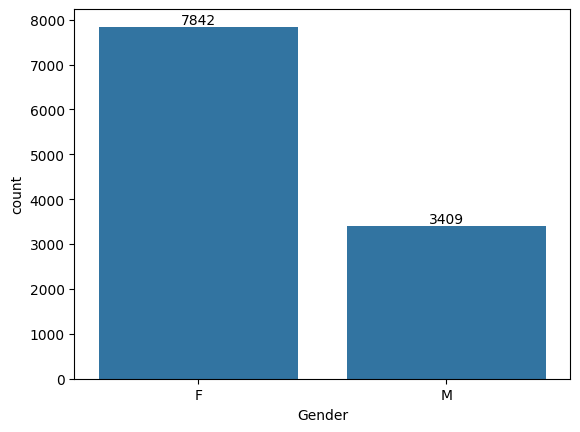

In [59]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

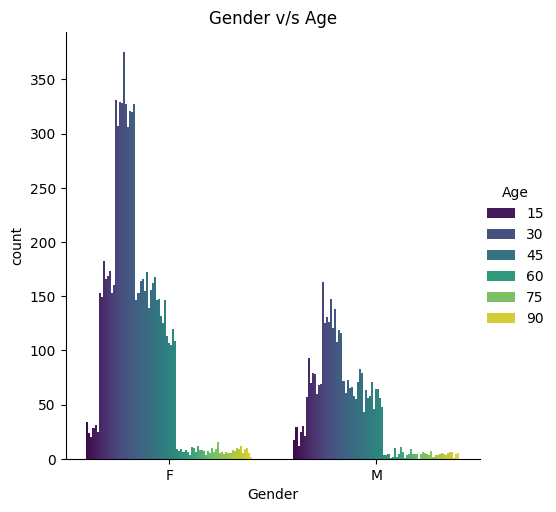

In [60]:
df['Age'] = df['Age'].astype('int64')

sns.catplot(data =df, kind='count', x='Gender', hue='Age', palette='viridis')
plt.title('Gender v/s Age')
plt.show()

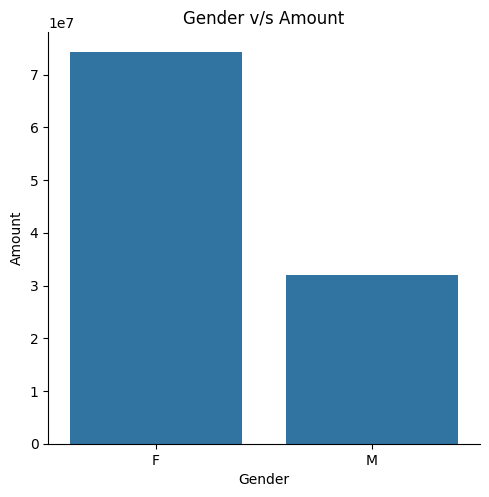

In [61]:
sale_gen = df.groupby(['Gender'])['Amount'].sum()
sale_gen

sns.catplot(data=sale_gen, kind='bar')
plt.title('Gender v/s Amount')
plt.show()

In [62]:
sale_by_age_group2 = df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sale_by_age_group2['Amount'] = sale_by_age_group2['Amount'].apply(lambda x : '{:,.2f}'.format(x))

sale_by_age_group2 = sale_by_age_group2.reset_index(drop=True)
sale_by_age_group2

,Age Group,Gender,Amount
0,26-35,F,"30,963,986.00"
1,36-45,F,"15,509,873.00"
2,18-25,F,"11,886,964.00"
3,26-35,M,"11,649,438.00"
4,46-50,F,"6,743,484.00"
5,36-45,M,"6,635,120.00"
6,51-55,F,"5,385,162.00"
7,18-25,M,"5,353,716.00"
8,51-55,M,"2,876,298.00"
9,46-50,M,"2,464,498.00"


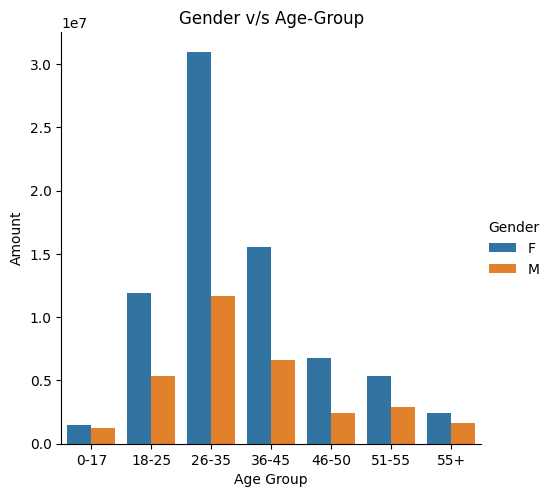

In [63]:
sale_by_age_group = df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum()

sns.catplot(data=sale_by_age_group, kind='bar', x = 'Age Group', y ='Amount', hue='Gender')
plt.title('Gender v/s Age-Group')
plt.show()


From most of our sale came from the `26-35 Female Age Group`

## Sale per State

In [64]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

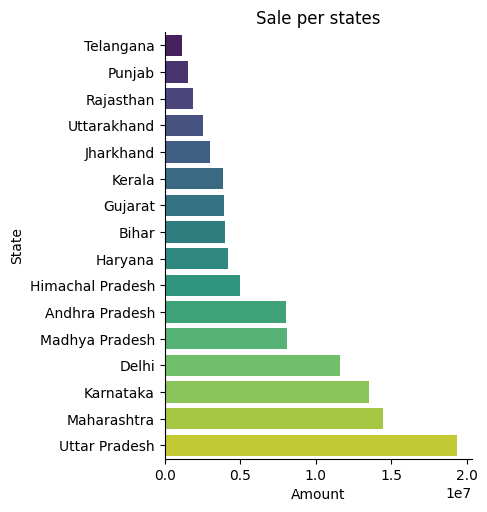

In [65]:
sale_by_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount')

sns.catplot(kind='bar', data=sale_by_state, y='State', x='Amount', palette='viridis')
plt.title('Sale per states')
plt.show()

Top 4 States are `Uttar Pradesh, Maharashtra, Karnataka, Delhi `

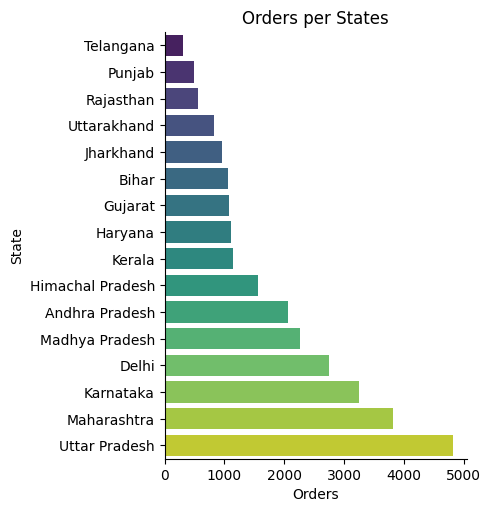

In [66]:
sale_by_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders')

sns.catplot(kind='bar', data=sale_by_state, y='State', x='Orders', palette='viridis')
plt.title('Orders per States')
plt.show()

## Martial status

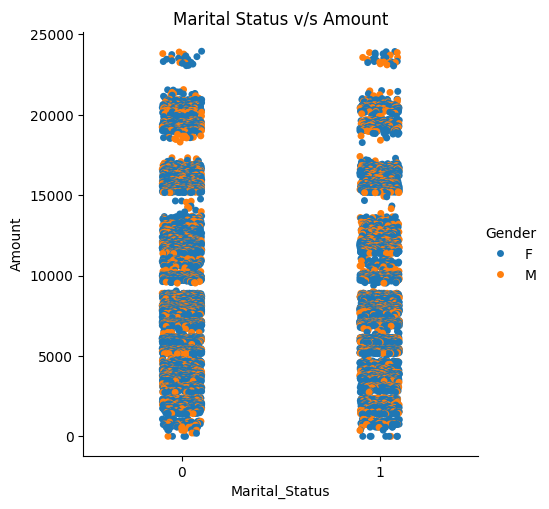

In [67]:
sns.catplot(data=df,  x='Marital_Status', y='Amount', hue='Gender')
plt.title('Marital Status v/s Amount')
plt.show()

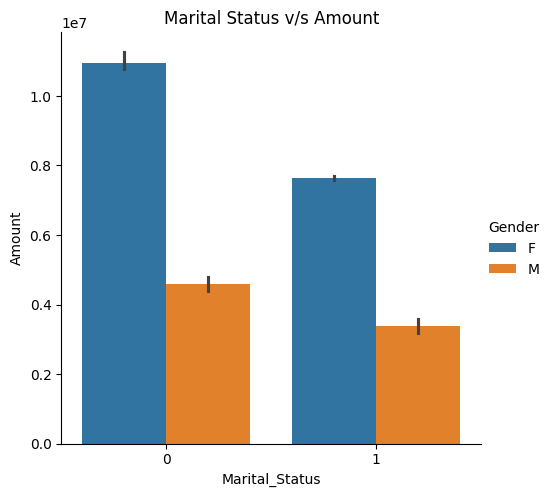

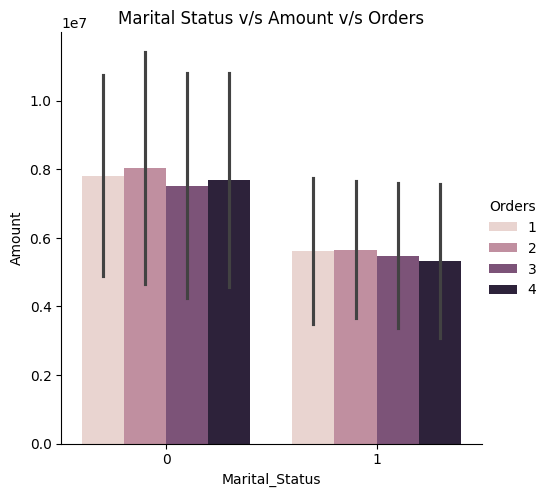

In [68]:
State_gender_sale = df.groupby(['Marital_Status', 'Gender', 'Orders'], as_index=False)['Amount'].sum()

sns.catplot(data=State_gender_sale, kind='bar', x='Marital_Status', y='Amount', hue='Gender')
plt.title('Marital Status v/s Amount')
sns.catplot(data=State_gender_sale, kind='bar', x='Marital_Status', y='Amount', hue='Orders')
plt.title('Marital Status v/s Amount v/s Orders')

plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

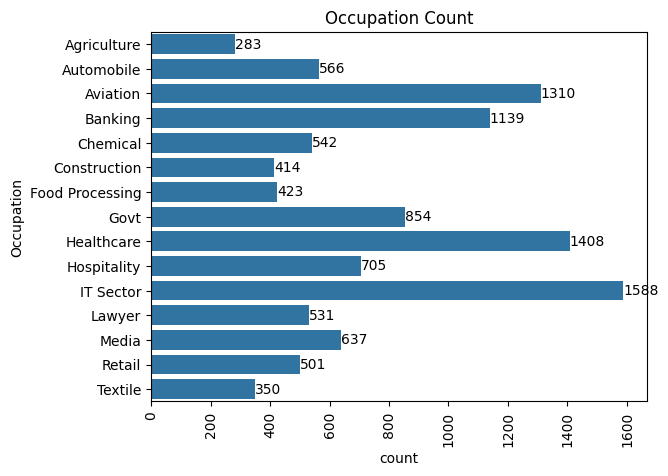

In [69]:
ax = sns.countplot(data = df, y = 'Occupation')
plt.xticks(rotation=90)
plt.title('Occupation Count')

for bars in ax.containers:
    ax.bar_label(bars)

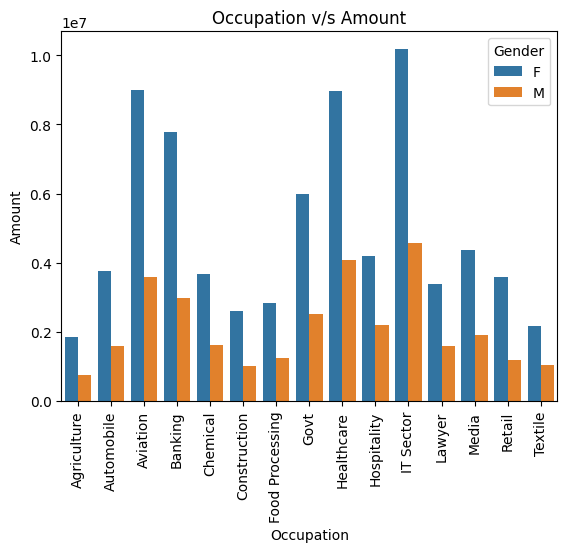

In [70]:
sale_occupation_state = df.groupby(['Occupation', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data=sale_occupation_state, x='Occupation', y='Amount', hue='Gender')
plt.xticks(rotation=90)
plt.title('Occupation v/s Amount')

plt.show()

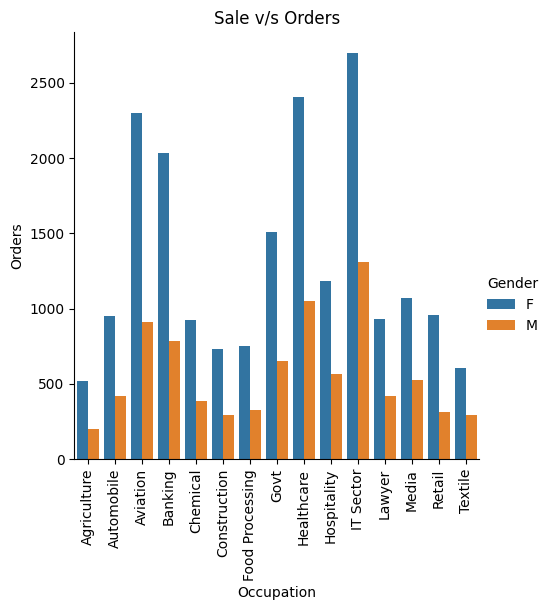

In [71]:
sale_occupation_state2 = df.groupby(['Occupation', 'Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

ax = sns.catplot(data=sale_occupation_state2, kind='bar', x='Occupation', y='Orders', hue='Gender')
plt.xticks(rotation=90)
plt.title('Sale v/s Orders')

plt.show()

In [72]:
sale_occupation_state1 = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sale_occupation_state1['Amount'] = sale_occupation_state1['Amount'].apply(lambda x: '{:,.2f}'.format(x))

sale_occupation_state1

,Occupation,Amount
10,IT Sector,"14,755,000.00"
8,Healthcare,"13,034,637.00"
2,Aviation,"12,602,325.00"
3,Banking,"10,770,596.00"
7,Govt,"8,517,298.00"
9,Hospitality,"6,376,336.00"
12,Media,"6,295,868.00"
1,Automobile,"5,368,566.00"
4,Chemical,"5,297,460.00"
11,Lawyer,"4,981,689.00"


Most of our customers are from the `IT sector, healthcare, aviation, and banking.`

## Product Category

In [73]:
pd1 = df.groupby(['Product_Category', 'Gender',], as_index=False)[['Amount', 'Orders']].sum().sort_values(by='Amount', ascending=False).reset_index(drop=True)
pd1['Amount'] = pd1['Amount'].apply(lambda x: '{:,.2f}'.format(x))

pd1

,Product_Category,Gender,Amount,Orders
0,Food,F,"24,175,970.00",4416
1,Footwear & Shoes,F,"11,534,598.00",1930
2,Clothing & Apparel,F,"11,479,195.00",4648
3,Electronics & Gadgets,F,"11,033,213.00",3682
4,Food,M,"9,757,812.00",1704
5,Clothing & Apparel,M,"5,015,929.00",1986
6,Electronics & Gadgets,M,"4,610,768.00",1544
7,Footwear & Shoes,M,"4,040,682.00",724
8,Furniture,F,"3,394,624.00",542
9,Games & Toys,F,"3,045,314.00",673


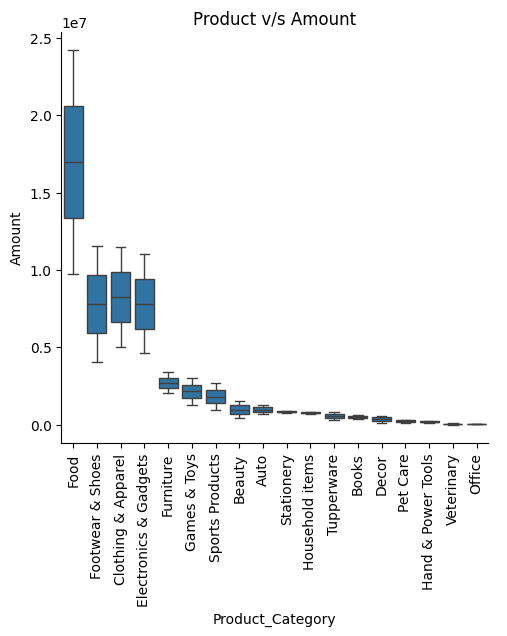

In [74]:
pd2 = df.groupby(['Product_Category', 'Gender',], as_index=False)[['Amount', 'Orders']].sum().sort_values(by='Amount', ascending=False).reset_index(drop=True)
sns.catplot(data=pd2, kind='box', x='Product_Category', y='Amount')
plt.xticks(rotation=90)
plt.title('Product v/s Amount')
plt.show()

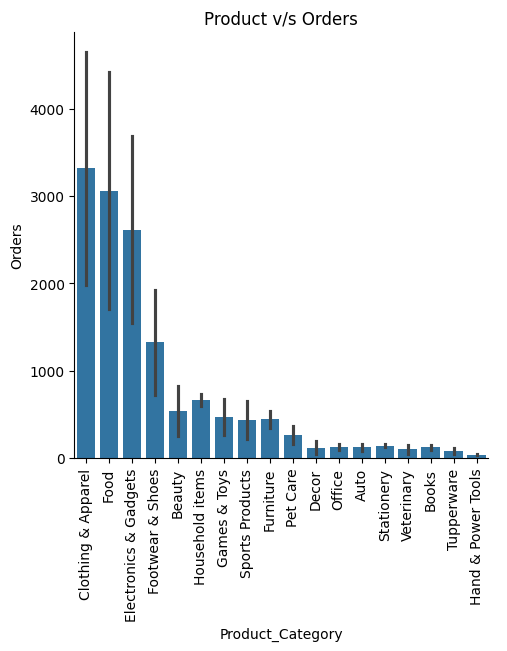

In [75]:
pd2 = df.groupby(['Product_Category', 'Gender',], as_index=False)[['Amount', 'Orders']].sum().sort_values(by='Orders', ascending=False).reset_index(drop=True)
sns.catplot(data=pd2, kind='bar', x='Product_Category', y='Orders')
plt.title('Product v/s Orders')
plt.xticks(rotation=90)
plt.show()

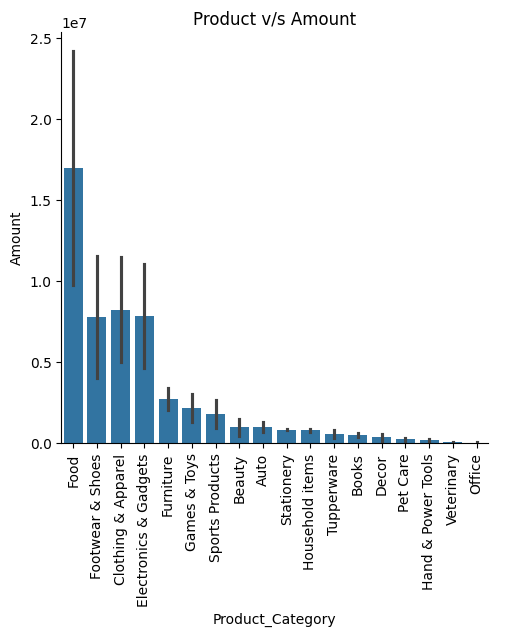

In [76]:
pd2 = df.groupby(['Product_Category', 'Gender',], as_index=False)[['Amount', 'Orders']].sum().sort_values(by='Amount', ascending=False).reset_index(drop=True)
sns.catplot(data=pd2, kind='bar', x='Product_Category', y='Amount')
plt.xticks(rotation=90)
plt.title('Product v/s Amount')
plt.show()

Most of our customers are buying clothing, food, electronics, and gadgets.

#### Top 4 Product from Top 4 States

In [77]:
# Get the top 4 states by total sales
top_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(4).index

# Filter the data to only include the top 4 states
df_top_states = df[df['State'].isin(top_states)]

# Get the top 4 products in each of the top 4 states
pd3 = df_top_states.groupby(['State', 'Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).groupby('State').head(4).reset_index(drop=True)

# top 4 product of 4 top state
pd3.groupby(['State', 'Product_Category'])['Amount'].sum().unstack()

Product_Category,Clothing & Apparel,Electronics & Gadgets,Food,Footwear & Shoes,Games & Toys,Stationery
State,,,,,,
Delhi,826260.0,NaN,2643600.0,5027404.0,NaN,1124608.0
Karnataka,1385438.0,NaN,3995450.0,4963982.0,609546.0,NaN
Maharashtra,2022249.0,1444601.0,6421554.0,804384.0,NaN,NaN
Uttar Pradesh,3104177.0,1671866.0,7983022.0,2114646.0,NaN,NaN


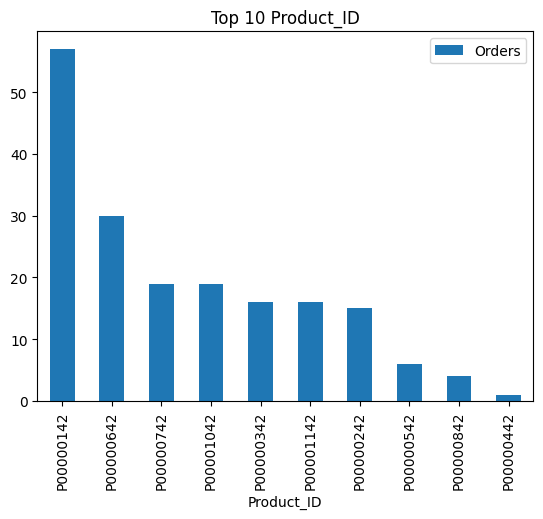

In [78]:
df.groupby(['Product_ID'], as_index=False)['Orders'].sum().head(10).sort_values( by='Orders', ascending=False).plot(kind='bar', x='Product_ID')
plt.title('Top 10 Product_ID')
plt.show()

# Conclusion:

*Married women age group 26-35 yrs from UP,  Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

In [79]:
# Time --> 07:34 am Tuesday, 27 August 2024 (IST)